In [1]:
import numpy as np
import pandas as pd

import jax
import jax.numpy as jnp


In [4]:
try:
  import pymc as pm
except ImportError:
  !pip install pymc
  import pymc as pm

In [11]:
try:    
  import ipywidgets
except ImportError:
  !pip install ipywidgets

In [3]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.constrained_layout.use':True})

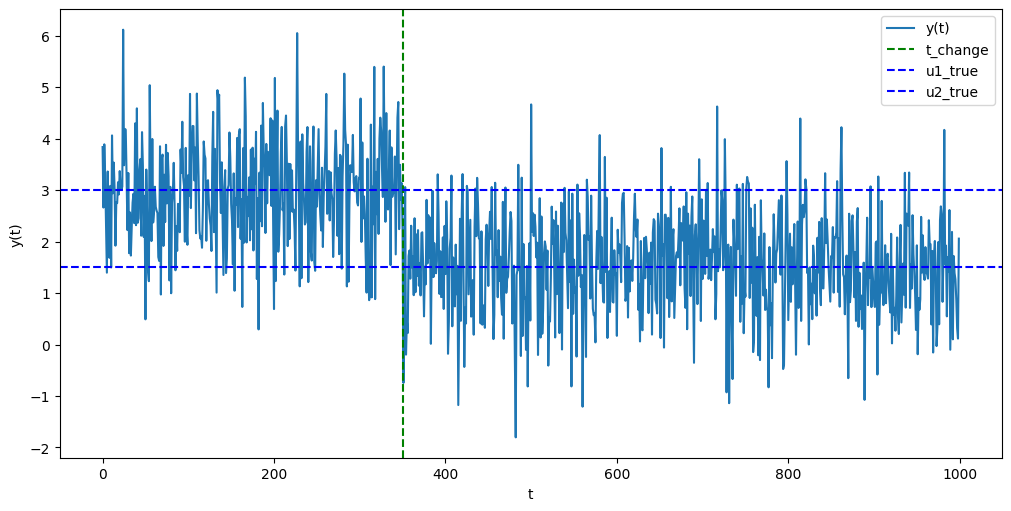

In [5]:
u1_true = 3
u2_true = 1.5
sigma_true = 1.0
t_change = 350

def generate_data(n=1000):
    """Generate synthetic data for the model."""
    t = np.arange(n)
    y_u = np.where(t < t_change, u1_true, u2_true)
    sigma = sigma_true

    y = y_u + np.random.normal(0, sigma, n)
    return t, y

# plot
def plot_data(t, y):
    """Plot the generated data."""
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 5))
    plt.plot(t, y, label='y(t)')
    plt.axvline(t_change, color='green', linestyle='--', label='t_change')
    plt.axhline(u1_true, color='blue', linestyle='--', label='u1_true')
    plt.axhline(u2_true, color='blue', linestyle='--', label='u2_true')
    plt.xlabel('t')
    plt.ylabel('y(t)')
    plt.legend()
    plt.show()


t, y = generate_data(1000)
plot_data(t, y)

In [6]:
with pm.Model() as model:
  # priors
  u = pm.Normal('u', mu=0, sigma=10, shape=2)
  sigma = pm.HalfNormal('sigma', sigma=1)
  t_change = pm.DiscreteUniform('t_change', lower=0, upper=len(t)-1)

  # systemic vars
  u_t = pm.math.switch(t < t_change, u[0], u[1])
  
  # likelihood
  y_t = pm.Normal('y_t', mu=u_t, sigma=sigma, observed=y)


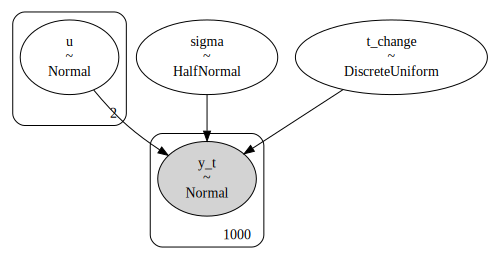

In [7]:
pm.model_to_graphviz(model)

In [8]:
with model:
  # inference
  idata = pm.sample(2000, tune=1000)


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [u, sigma]
>Metropolis: [t_change]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 3 seconds.


,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
sigma,1.003,0.022,0.961,1.046,0.000,0.000,10432.0,5705.0,1.0
t_change,350.128,1.027,348.000,351.000,0.030,0.030,1182.0,1463.0,1.0
u[0],2.970,0.053,2.866,3.075,0.001,0.001,9146.0,6110.0,1.0
u[1],1.549,0.039,1.476,1.627,0.000,0.000,10311.0,6359.0,1.0


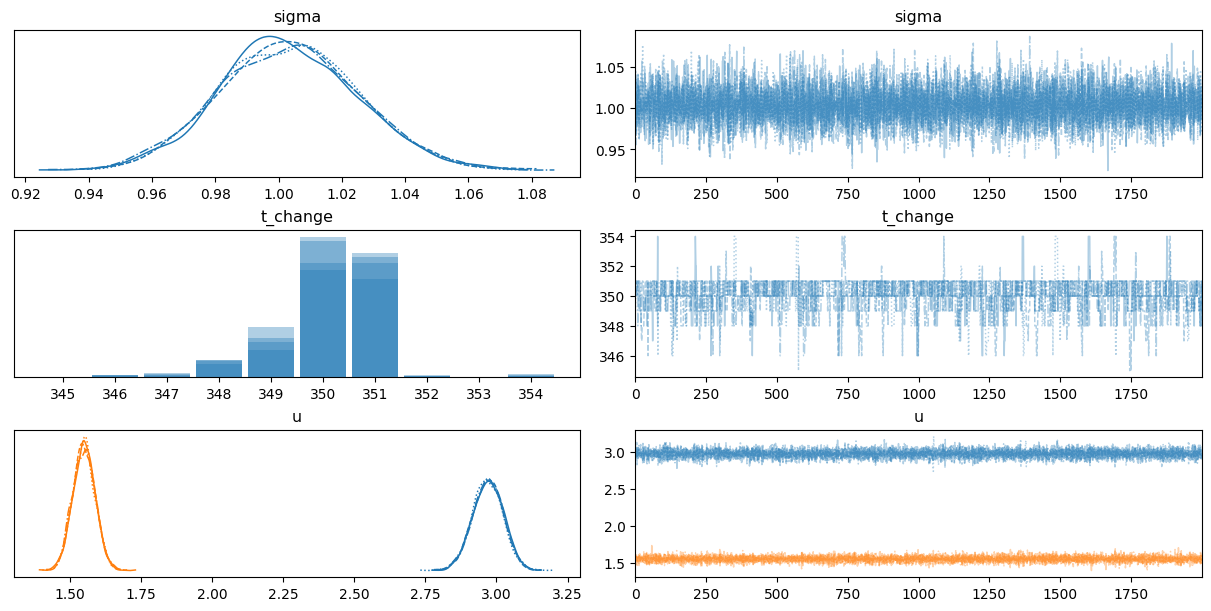

In [9]:
pm.plot_trace(idata)
pm.summary(idata, hdi_prob=0.95)

<Axes: >

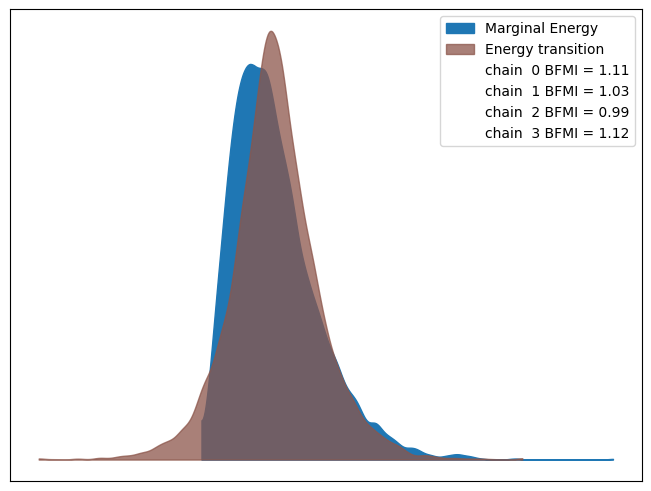

In [10]:
pm.plot_energy(idata)